## Estudo de Data Science

######  Importação de bibliotecas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn.objects import Plot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

###### Importando dados

In [2]:
path = 'osteoporosis.csv'
dataset = pd.read_csv(path)

In [3]:
dataset.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [4]:
dataset = dataset.dropna()
df = dataset.drop(columns='Id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [6]:
for coluna in df.columns:
    if df[coluna].dtype == 'object':
        enc = LabelEncoder()
        df[coluna] = enc.fit_transform(df[coluna])

In [5]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


In [7]:
escala = MinMaxScaler()
df_normalize = pd.DataFrame(escala.fit_transform(df), columns=df.columns)

In [8]:
df_normalize.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,0.708333,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.194444,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0
2,0.986111,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.277778,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


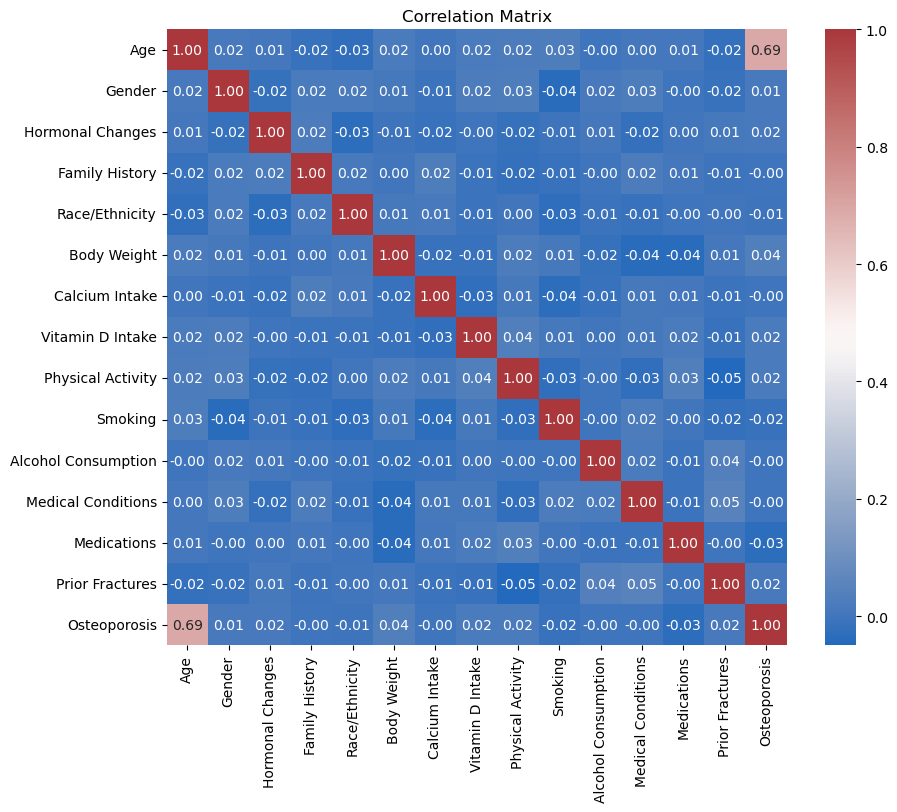

In [9]:
correlation_matrix = df_normalize.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
features_name = ['Age','Gender', 'Hormonal Changes', 'Family History',
            'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
            'Physical Activity', 'Smoking', 'Alcohol Consumption',
            'Medications', 'Prior Fractures','Osteoporosis'] 
df_dum = pd.get_dummies(df_normalize[features_name],drop_first=True) 

In [12]:
df_dum

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medications,Prior Fractures,Osteoporosis
0,0.708333,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.194444,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.986111,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.277778,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.013889,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1954,0.069444,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1955,0.222222,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1956,0.097222,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [13]:
features = df_dum.drop(columns='Osteoporosis')
label = df_dum['Osteoporosis']
print(features.shape)

new_features = SelectKBest(f_classif).fit_transform(features,label)
print(new_features.shape)

X = pd.DataFrame(new_features)
y = label
#Separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

(1958, 12)
(1958, 10)


In [14]:
modelo_classifier = tree.DecisionTreeClassifier()
modelo_classifier = modelo_classifier.fit(X_train,y_train)
y_pred = modelo_classifier.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       315
         1.0       0.82      0.86      0.84       332

    accuracy                           0.83       647
   macro avg       0.83      0.83      0.83       647
weighted avg       0.83      0.83      0.83       647



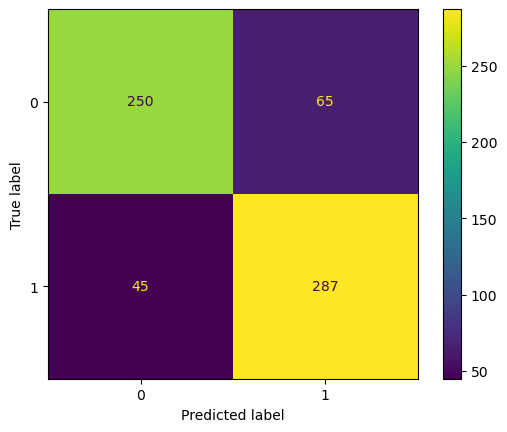

In [15]:
matriz = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(matriz).plot()

print(classification_report(y_test,y_pred))